In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
WNS_train = pd.read_csv("train.csv")
WNS_train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [4]:
WNS_test = pd.read_csv("test.csv")
WNS_test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [5]:
WNS_item_data = pd.read_csv("item_data.csv")
WNS_item_data.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [6]:
WNS_view_log = pd.read_csv("view_log.csv")
WNS_view_log.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [7]:
WNS_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90675 entries, 0 to 90674
Data columns (total 6 columns):
impression_id      90675 non-null object
impression_time    90675 non-null object
user_id            90675 non-null int64
app_code           90675 non-null int64
os_version         90675 non-null object
is_4G              90675 non-null int64
dtypes: int64(3), object(3)
memory usage: 4.2+ MB


In [8]:
WNS_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237609 entries, 0 to 237608
Data columns (total 7 columns):
impression_id      237609 non-null object
impression_time    237609 non-null object
user_id            237609 non-null int64
app_code           237609 non-null int64
os_version         237609 non-null object
is_4G              237609 non-null int64
is_click           237609 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.7+ MB


In [9]:
WNS_item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132761 entries, 0 to 132760
Data columns (total 6 columns):
item_id         132761 non-null int64
item_price      132761 non-null int64
category_1      132761 non-null int64
category_2      132761 non-null int64
category_3      132761 non-null int64
product_type    132761 non-null int64
dtypes: int64(6)
memory usage: 6.1 MB


In [10]:
WNS_view_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118622 entries, 0 to 3118621
Data columns (total 5 columns):
server_time    object
device_type    object
session_id     int64
user_id        int64
item_id        int64
dtypes: int64(3), object(2)
memory usage: 119.0+ MB


In [11]:
WNS_test.isnull().sum()

impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
dtype: int64

In [12]:
WNS_train.isnull().sum()

impression_id      0
impression_time    0
user_id            0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

In [13]:
WNS_item_data.isnull().sum()

item_id         0
item_price      0
category_1      0
category_2      0
category_3      0
product_type    0
dtype: int64

In [14]:
WNS_view_log.isnull().sum()

server_time    0
device_type    0
session_id     0
user_id        0
item_id        0
dtype: int64

In [15]:
os_version_train = WNS_train['os_version'].value_counts()
print(os_version_train)
print(WNS_train['os_version'].value_counts(normalize = True)*100)

latest          129216
intermediate     55543
old              52850
Name: os_version, dtype: int64
latest          54.381778
intermediate    23.375798
old             22.242423
Name: os_version, dtype: float64


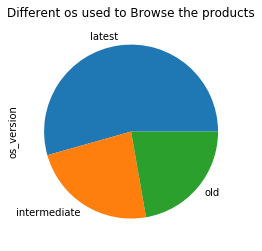

In [16]:
os_version_train.plot.pie(title="Different os used to Browse the products")

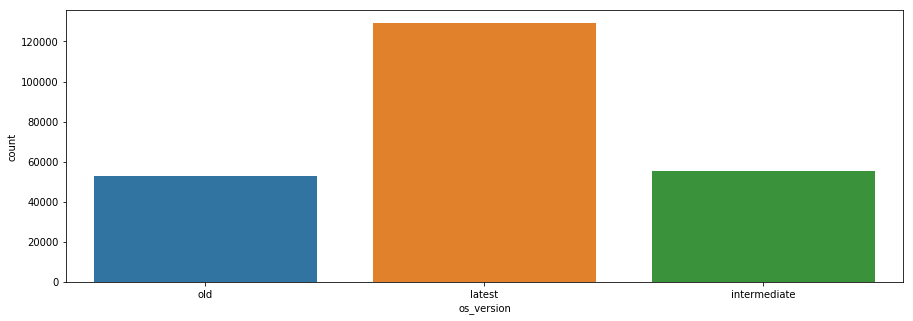

In [17]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(WNS_train['os_version'])
plt.show()

In [18]:
os_version_test = WNS_test['os_version'].value_counts()
print(os_version_test)
print(WNS_test['os_version'].value_counts(normalize = True)*100)

latest          48806
intermediate    21247
old             20622
Name: os_version, dtype: int64
latest          53.825200
intermediate    23.432037
old             22.742763
Name: os_version, dtype: float64


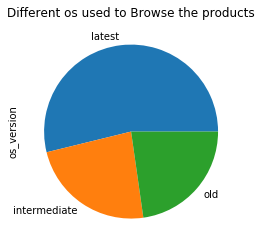

In [19]:
os_version_test.plot.pie(title="Different os used to Browse the products")

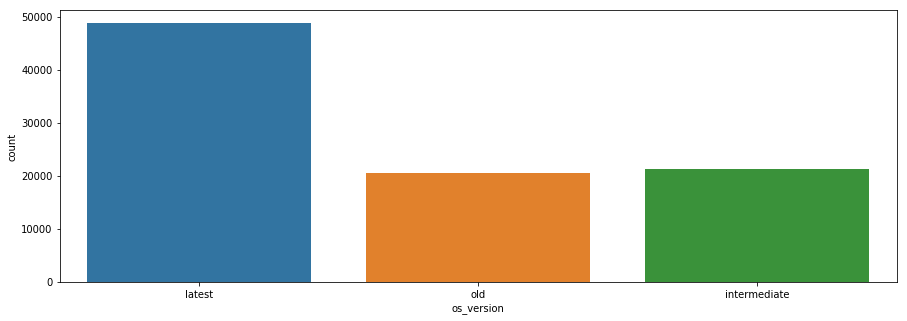

In [20]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(WNS_test['os_version'])
plt.show()

In [21]:
print('From Train Data')
print(WNS_train['is_4G'].value_counts())
print(WNS_train['is_4G'].value_counts(normalize=True)*100)

print('From test Data')
print(WNS_test['is_4G'].value_counts())
print(WNS_test['is_4G'].value_counts(normalize=True)*100)

From Train Data
0    151758
1     85851
Name: is_4G, dtype: int64
0    63.868793
1    36.131207
Name: is_4G, dtype: float64
From test Data
0    58225
1    32450
Name: is_4G, dtype: int64
0    64.212848
1    35.787152
Name: is_4G, dtype: float64


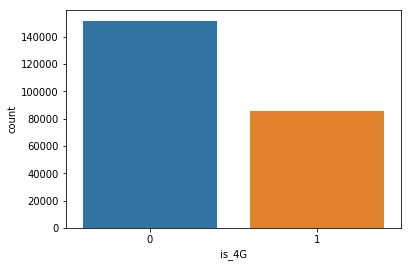

In [22]:
sns.countplot(WNS_train["is_4G"])

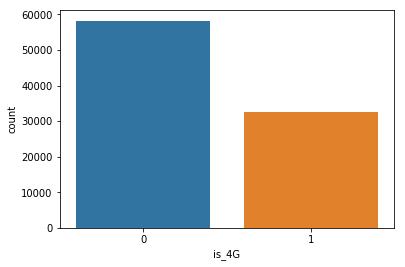

In [23]:
sns.countplot(WNS_test["is_4G"])

0    226747
1     10862
Name: is_click, dtype: int64
0    95.428624
1     4.571376
Name: is_click, dtype: float64


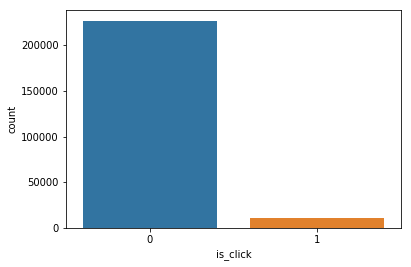

In [24]:
print(WNS_train['is_click'].value_counts())
print(WNS_train['is_click'].value_counts(normalize=True)*100)
sns.countplot(WNS_train["is_click"])

In [25]:
WNS_train['is_4G'][WNS_train['is_4G'] == 0] = 'Other Network'
WNS_train['is_4G'][WNS_train['is_4G'] == 1] = '4G_Network'
WNS_train.head()

C:\Users\GRENINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,Other Network,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,4G_Network,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,4G_Network,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,4G_Network,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,Other Network,0


In [26]:
WNS_test['is_4G'][WNS_test['is_4G'] == 0] = 'Other Network'
WNS_test['is_4G'][WNS_test['is_4G'] == 1] = '4G_Network'
WNS_test.head()


C:\Users\GRENINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,4G_Network
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,Other Network
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,4G_Network
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,4G_Network
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,4G_Network


In [27]:
print(WNS_train.user_id.nunique())
print(WNS_train.user_id.count())
print(WNS_train.app_code.nunique())
print(WNS_train.app_code.count())

74723
237609
490
237609


In [28]:
import datetime as dt
WNS_train['impression_time'] = pd.to_datetime(WNS_train['impression_time'])
WNS_test['impression_time'] = pd.to_datetime(WNS_test['impression_time'])

In [29]:
WNS_train['impression_time_quarter'] = WNS_train['impression_time'].dt.quarter
WNS_train['impression_time_month'] = WNS_train['impression_time'].dt.month
WNS_train['impression_time_day'] = WNS_train['impression_time'].dt.day
WNS_train['impression_time_dayofweek'] = WNS_train['impression_time'].dt.dayofweek
WNS_train['impression_time_weekday'] = WNS_train['impression_time'].dt.weekday_name
WNS_train['impression_time_is_weekend'] = np.where(WNS_train['impression_time'].dt.dayofweek.isin(['Sunday', 'Saturday']), 1,0)

WNS_test['impression_time_quarter'] = WNS_test['impression_time'].dt.quarter
WNS_test['impression_time_month'] = WNS_test['impression_time'].dt.month
WNS_test['impression_time_day'] = WNS_test['impression_time'].dt.day
WNS_test['impression_time_dayofweek'] = WNS_test['impression_time'].dt.dayofweek
WNS_test['impression_time_weekday'] = WNS_test['impression_time'].dt.weekday_name
WNS_test['impression_time_is_weekend'] = np.where(WNS_test['impression_time'].dt.dayofweek.isin(['Sunday', 'Saturday']), 1,0)

In [30]:
WNS_train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,impression_time_quarter,impression_time_month,impression_time_day,impression_time_dayofweek,impression_time_weekday,impression_time_is_weekend
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,Other Network,0,4,11,15,3,Thursday,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,4G_Network,1,4,11,15,3,Thursday,0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,4G_Network,0,4,11,15,3,Thursday,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,4G_Network,0,4,11,15,3,Thursday,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,Other Network,0,4,11,15,3,Thursday,0


In [31]:
WNS_test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,impression_time_quarter,impression_time_month,impression_time_day,impression_time_dayofweek,impression_time_weekday,impression_time_is_weekend
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,4G_Network,4,12,13,3,Thursday,0
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,Other Network,4,12,13,3,Thursday,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,4G_Network,4,12,13,3,Thursday,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,4G_Network,4,12,13,3,Thursday,0
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,4G_Network,4,12,13,3,Thursday,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [73]:
WNS_train_final = pd.get_dummies(WNS_train, columns=['is_4G','os_version','impression_time_weekday'])
WNS_train_final.head()

,impression_id,impression_time,user_id,app_code,is_click,impression_time_quarter,impression_time_month,impression_time_day,impression_time_dayofweek,impression_time_is_weekend,...,os_version_intermediate,os_version_latest,os_version_old,impression_time_weekday_Friday,impression_time_weekday_Monday,impression_time_weekday_Saturday,impression_time_weekday_Sunday,impression_time_weekday_Thursday,impression_time_weekday_Tuesday,impression_time_weekday_Wednesday
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,0,4,11,15,3,0,...,0,0,1,0,0,0,0,1,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,1,4,11,15,3,0,...,0,1,0,0,0,0,0,1,0,0
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,0,4,11,15,3,0,...,1,0,0,0,0,0,0,1,0,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,0,4,11,15,3,0,...,0,1,0,0,0,0,0,1,0,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,0,4,11,15,3,0,...,0,1,0,0,0,0,0,1,0,0


In [74]:
WNS_test_final = pd.get_dummies(WNS_test, columns=['is_4G','os_version','impression_time_weekday'])
WNS_test_final.head()

,impression_id,impression_time,user_id,app_code,impression_time_quarter,impression_time_month,impression_time_day,impression_time_dayofweek,impression_time_is_weekend,is_4G_4G_Network,...,os_version_intermediate,os_version_latest,os_version_old,impression_time_weekday_Friday,impression_time_weekday_Monday,impression_time_weekday_Saturday,impression_time_weekday_Sunday,impression_time_weekday_Thursday,impression_time_weekday_Tuesday,impression_time_weekday_Wednesday
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,4,12,13,3,0,1,...,0,1,0,0,0,0,0,1,0,0
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,4,12,13,3,0,0,...,0,1,0,0,0,0,0,1,0,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,4,12,13,3,0,1,...,0,1,0,0,0,0,0,1,0,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,4,12,13,3,0,1,...,0,1,0,0,0,0,0,1,0,0
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,4,12,13,3,0,1,...,0,1,0,0,0,0,0,1,0,0


In [75]:
y_train = WNS_train_final['is_click'].astype('float')
X_train = WNS_train_final.drop(columns=['is_click','impression_id','impression_time','user_id','impression_time_quarter','impression_time_dayofweek'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

In [76]:
y_train = y_train.as_matrix()
y_train

C:\Users\GRENINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0., 0., 0., ..., 1., 0., 0.])

In [77]:
X_train = X_train.as_matrix()
X_train

C:\Users\GRENINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[386,  11,  29, ...,   1,   0,   0],
       [207,  12,   3, ...,   0,   0,   0],
       [385,  12,  10, ...,   0,   0,   0],
       ...,
       [469,  11,  20, ...,   0,   1,   0],
       [386,  12,   7, ...,   0,   0,   0],
       [385,  11,  25, ...,   0,   0,   0]], dtype=int64)

In [78]:
X_test = X_test.as_matrix()
X_test

C:\Users\GRENINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[469,  11,  24, ...,   0,   0,   0],
       [386,  11,  20, ...,   0,   1,   0],
       [469,  11,  22, ...,   1,   0,   0],
       ...,
       [283,  11,  24, ...,   0,   0,   0],
       [386,  12,  12, ...,   0,   0,   1],
       [359,  11,  16, ...,   0,   0,   0]], dtype=int64)

In [79]:
y_test = y_test.as_matrix()
y_test

C:\Users\GRENINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0., 0., 0., ..., 1., 0., 0.])

# Logistic Regression:

In [80]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [81]:
# Fit the model
logmodel.fit(X_train,y_train)

C:\Users\GRENINJA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# Predict the model
LR_pred = logmodel.predict(X_test)
LR_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(LR_pred,y_test))

[[56644  2759]
 [    0     0]]


In [84]:
# Accuracy
from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(LR_pred,y_test)
LR_accuracy

0.9535545342827804

# K-Nearest Neighbour

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [86]:
# Fit the Model
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [87]:
# Predict the Model
knn_pred = classifier.predict(X_test)
knn_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(knn_pred,y_test))

[[56179  2719]
 [  465    40]]


In [89]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_knn=accuracy_score(knn_pred,y_test)
accuracy_knn

0.9464000134673333

# Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [91]:
# Fit the model
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [92]:
# Predict the model
DT_pred = classifier1.predict(X_test)
DT_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [93]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(DT_pred,y_test))

[[56463  2735]
 [  181    24]]


In [94]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_DT = accuracy_score(DT_pred,y_test)
accuracy_DT

0.9509115701227211

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(criterion='entropy',random_state=0)
classifier3

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
# Fit the model
classifier3.fit(X_train,y_train)

C:\Users\GRENINJA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
# Predict the model
RF_pred = classifier3.predict(X_test)
RF_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [98]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(RF_pred,y_test))

[[56445  2738]
 [  199    21]]


In [99]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_RF = accuracy_score(RF_pred,y_test)
accuracy_RF

0.9505580526236048

In [100]:
model_performance = pd.DataFrame({
    "Model": ['Logistic Regression','K-Nearest Neighbour','Decision Tree Classifier','Random Forest Classifier'],
    "Accuracy Score": [LR_accuracy,accuracy_knn,accuracy_DT,accuracy_RF]
})

model_performance.sort_values(by="Accuracy Score", ascending=False)


,Model,Accuracy Score
0,Logistic Regression,0.953555
2,Decision Tree Classifier,0.950912
3,Random Forest Classifier,0.950558
1,K-Nearest Neighbour,0.946400


# Logistic Regression Gives the Better Accuracy:

In [101]:
train_val=pd.DataFrame({"Actual":y_train,"Pred":classifier1.predict(X_train)})
test_val=pd.DataFrame({"Actual":y_test,"Pred":classifier1.predict(X_test)})
test_val.tail()


,Actual,Pred
59398,0.0,0.0
59399,0.0,0.0
59400,1.0,1.0
59401,0.0,0.0
59402,0.0,0.0


Text(33.0, 0.5, 'Predicted Label')

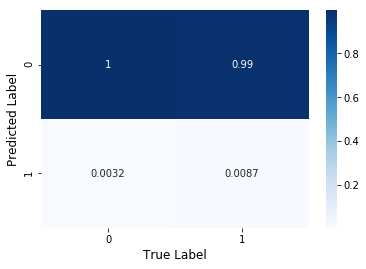

In [102]:
# Confusion Matrix
cm = confusion_matrix(y_test, DT_pred).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

In [70]:
WNS_test_final = WNS_test_final.drop(columns=['impression_id','impression_time','user_id','impression_time_quarter','impression_time_dayofweek'],axis=1)#.as_matrix()
WNS_test_final.head()

,app_code,impression_time_is_weekend,is_4G_4G_Network,is_4G_Other Network,os_version_intermediate,os_version_latest,os_version_old,impression_time_weekday_Friday,impression_time_weekday_Monday,impression_time_weekday_Saturday,...,impression_time_weekday_Tuesday,impression_time_weekday_Wednesday,impression_time_month_12,impression_time_day_12,impression_time_day_13,impression_time_day_14,impression_time_day_15,impression_time_day_16,impression_time_day_17,impression_time_day_18
0,127,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,44,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,296,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,207,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,242,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


# ROC Accuracy of the Logistic Regression

In [64]:
from sklearn.metrics import roc_auc_score
ROC_Acc = roc_auc_score(y_test, DT_pred)
ROC_Acc

0.5027475608711386

The Accuracy Score of the Logistic Regression is 95.4%

The Accuracy Score of the ROC curve is 50%

In [65]:
Predictions = classifier1.predict(WNS_test_final)
submission = pd.DataFrame({'impression_id':WNS_test['impression_id'], 'is_click':Predictions})
submission.head()

ValueError: Number of features of the model must match the input. Model n_features is 45 and input n_features is 22 

In [ ]:
submission.to_csv('submission.csv', index=False)